<a href="https://colab.research.google.com/github/abhiramshanmuga/Data_Analytics_Assignement_upliance.ai/blob/main/analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file to check the structure of each sheet
file_path = 'Assignment.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to identify datasets
excel_data.sheet_names


['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

Inspecting the dataset

In [29]:
# Load each sheet into a DataFrame for inspection
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display the first few rows of each dataset to understand their structure
user_details_head = user_details.head()
cooking_sessions_head = cooking_sessions.head()
order_details_head = order_details.head()

user_details_head, cooking_sessions_head, order_details_head


(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lunch 202

In [30]:
# Remove duplicates if any in the datasets
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

Handling missing values

In [31]:
# Handle missing values - fill with 'Unknown' or median/mean where necessary
user_details.fillna('Unknown', inplace=True)
cooking_sessions.fillna({'Duration (mins)': cooking_sessions['Duration (mins)'].median()}, inplace=True)
order_details.fillna({'Amount (USD)': order_details['Amount (USD)'].median()}, inplace=True)

In [32]:
# Ensure that the date columns are in proper datetime format
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])

In [33]:
# Check the column names for each dataset
print(order_details.columns)
print(cooking_sessions.columns)
print(user_details.columns)


Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')
Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')
Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')


In [34]:
# Clean column names by stripping whitespace and converting to lowercase
order_details.columns = order_details.columns.str.strip().str.lower()
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.lower()
user_details.columns = user_details.columns.str.strip().str.lower()

# Print the cleaned column names to verify
print(order_details.columns)
print(cooking_sessions.columns)
print(user_details.columns)


Index(['order id', 'user id', 'order date', 'meal type', 'dish name',
       'order status', 'amount (usd)', 'time of day', 'rating', 'session id'],
      dtype='object')
Index(['session id', 'user id', 'dish name', 'meal type', 'session start',
       'session end', 'duration (mins)', 'session rating'],
      dtype='object')
Index(['user id', 'user name', 'age', 'location', 'registration date', 'phone',
       'email', 'favorite meal', 'total orders'],
      dtype='object')


In [35]:
# Merge the datasets using the correct column names
merged_data = pd.merge(order_details, cooking_sessions, left_on='session id', right_on='session id', how='inner')

# Rename 'user id_x' and 'user id_y' in merged_data for clarity
merged_data = merged_data.rename(columns={'user id_x': 'user id', 'user id_y': 'session user id'})

# Now merge with user_details on the 'user id' column
final_data = pd.merge(merged_data, user_details, on='user id', how='inner')

# Verify the final merged dataset
print(final_data.head())


   order id user id order date meal type_x      dish name_x order status  \
0      1001    U001 2024-12-01      Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01       Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02      Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02   Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03       Lunch     Caesar Salad    Completed   

   amount (usd) time of day  rating session id  ... duration (mins)  \
0          15.0       Night     5.0       S001  ...              30   
1          10.0         Day     4.0       S002  ...              20   
2          12.5       Night     NaN       S003  ...              40   
3           8.0     Morning     4.0       S004  ...              30   
4           9.0         Day     4.0       S005  ...              15   

  session rating      user name age       location  registration date  \
0            4.5  Alice Johnson  28       N

Data Analysis

In [36]:
# 1. Analyzing the relationship between cooking sessions and user orders
# Calculate the number of orders per user
orders_per_user = final_data.groupby('user id')['order id'].count().reset_index()
orders_per_user.rename(columns={'order id': 'OrdersCount'}, inplace=True)

# 2. Identify popular dishes based on orders
# Using 'dish name_y' column based on the output from final_data.columns
popular_dishes = final_data['dish name_y'].value_counts().reset_index()
popular_dishes.columns = ['Dish', 'OrderCount']

# 3. Exploring demographic factors influencing user behavior
# Grouping by 'Age' to analyze how demographics affect orders
age_group_orders = final_data.groupby('age')['order id'].count().reset_index()
age_group_orders.rename(columns={'order id': 'OrdersCount'}, inplace=True)

# 4. Exploring meal type preferences based on demographics
meal_type_by_age = final_data.groupby(['age', 'meal type_x'])['order id'].count().reset_index()
meal_type_by_age.rename(columns={'order id': 'OrdersCount'}, inplace=True)

# Display results
print("Orders per User:")
print(orders_per_user.head())
print("\nPopular Dishes:")
print(popular_dishes.head())
print("\nOrders by Age Group:")
print(age_group_orders.head())
print("\nMeal Type Preferences by Age:")
print(meal_type_by_age.head())

Orders per User:
  user id  OrdersCount
0    U001            3
1    U002            3
2    U003            3
3    U004            2
4    U005            2

Popular Dishes:
              Dish  OrderCount
0        Spaghetti           4
1  Grilled Chicken           4
2     Caesar Salad           3
3         Pancakes           2
4    Veggie Burger           2

Orders by Age Group:
   age  OrdersCount
0   25            1
1   27            2
2   28            3
3   30            2
4   31            1

Meal Type Preferences by Age:
   age meal type_x  OrdersCount
0   25      Dinner            1
1   27      Dinner            1
2   27       Lunch            1
3   28   Breakfast            1
4   28      Dinner            2


Visualizations

<ipython-input-37-f645aeed58e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OrderCount', y='Dish', data=popular_dishes.head(10), palette='viridis')


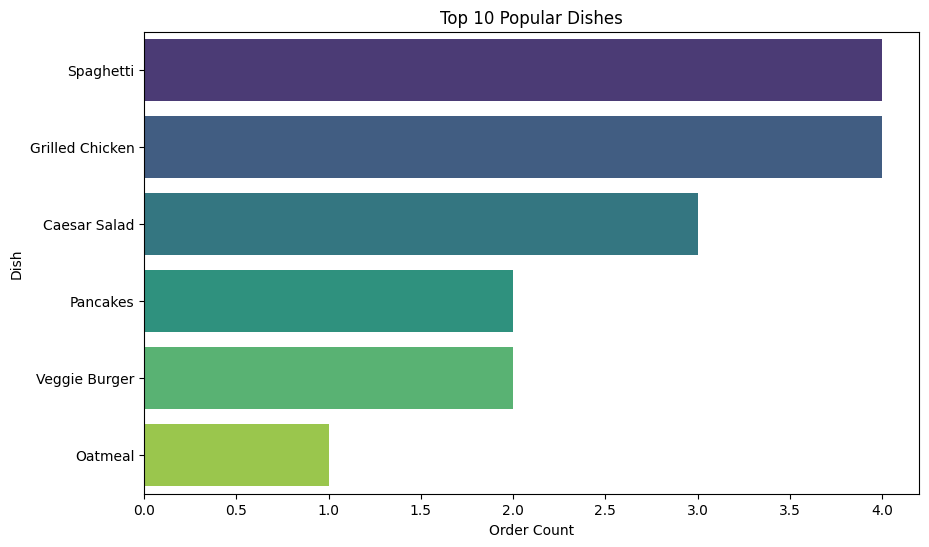

In [37]:
# Bar plot of popular dishes
plt.figure(figsize=(10, 6))
sns.barplot(x='OrderCount', y='Dish', data=popular_dishes.head(10), palette='viridis')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Order Count')
plt.ylabel('Dish')
plt.show()

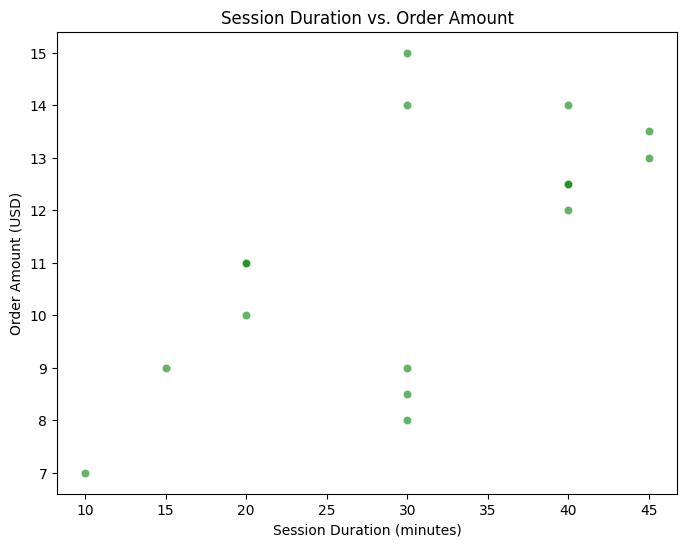

In [38]:
# Scatter plot to see the relationship between cooking session duration and order amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration (mins)', y='amount (usd)', data=final_data, alpha=0.6, color='green')
plt.title('Session Duration vs. Order Amount')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Order Amount (USD)')
plt.show()

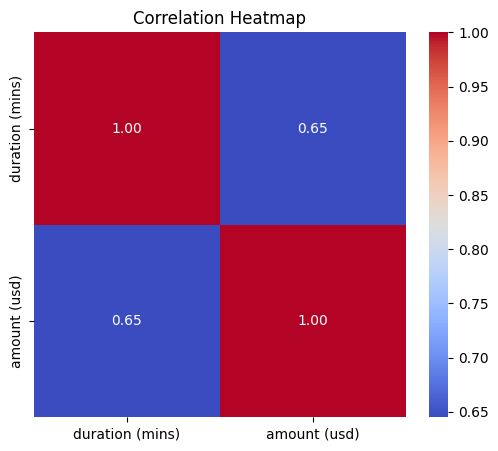

In [39]:
# Heatmap showing correlation between different numerical columns
correlation_matrix = final_data[['duration (mins)', 'amount (usd)']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-40-78cfa8b0fb7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='OrdersCount', data=age_group_orders, palette='coolwarm')


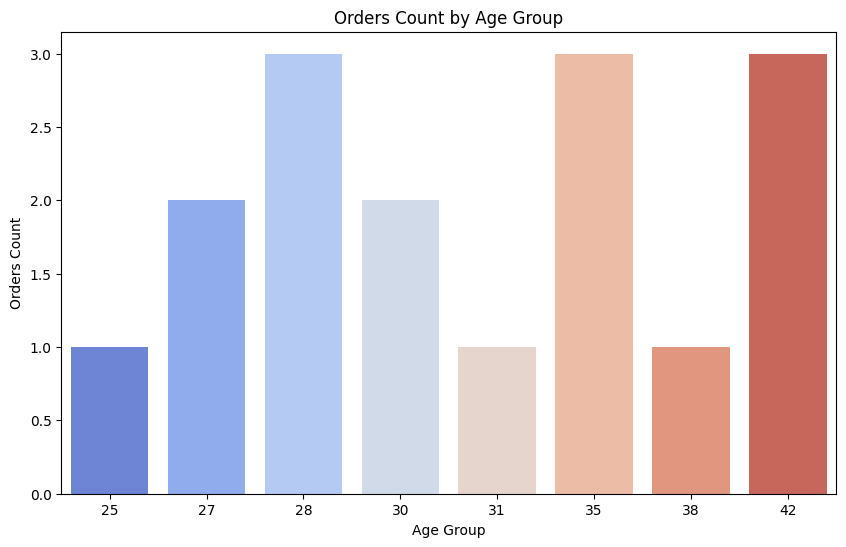

In [40]:
# Bar plot showing orders by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='OrdersCount', data=age_group_orders, palette='coolwarm')
plt.title('Orders Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Orders Count')
plt.show()